In [9]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# 1. The Series Class

**A Series** object represents a one-dimensional, indexed series of data. It can be thought of as a dictionary, with one main difference: the indexes in a Series class are ordered

In [8]:
grades1 = Series([76, 82, 78, 100],
                index = ['Alex', 'Robert', 'Minnie', 'Alice'],
                name = 'Assignment 1', dtype=float64)
grades1

Alex       76.0
Robert     82.0
Minnie     78.0
Alice     100.0
Name: Assignment 1, dtype: float64

In [11]:
print grades1['Minnie']
grades1['Minnie'] = 80
grades1['Theo'] = 92
grades1

78.0


Alex       76.0
Robert     82.0
Minnie     80.0
Alice     100.0
Theo       92.0
Name: Assignment 1, dtype: float64

In [12]:
for student in grades1.keys():
    print '{} got {} points in {}'.format(student, grades1[student], grades1.name)

Alex got 76.0 points in Assignment 1
Robert got 82.0 points in Assignment 1
Minnie got 80.0 points in Assignment 1
Alice got 100.0 points in Assignment 1
Theo got 92.0 points in Assignment 1


In [13]:
grades1[2]

80.0

In [14]:
grades1[1:-1]

Robert     82.0
Minnie     80.0
Alice     100.0
Name: Assignment 1, dtype: float64

In [15]:
grades1[['Theo', 'Alice']]

Theo      92.0
Alice    100.0
Name: Assignment 1, dtype: float64

**append new data to the series**

In [16]:
grades1a = grades1.append(Series([79, 81], index=['Theo', 'Joe']))
grades1a

Alex       76.0
Robert     82.0
Minnie     80.0
Alice     100.0
Theo       92.0
Theo       79.0
Joe        81.0
dtype: float64

In [17]:
grades1a['Theo']

Theo    92.0
Theo    79.0
dtype: float64

In [18]:
grades2 = Series([87, 76, 76, 94, 88],
                index = ['Alex', 'Lucy', 'Robert', 'Minnie', 'Alice'],
                name = 'Assignment 2',
                dtype = float64)
grades2

Alex      87.0
Lucy      76.0
Robert    76.0
Minnie    94.0
Alice     88.0
Name: Assignment 2, dtype: float64

**If we want to compute each student's average in the two assignments**

In [20]:
average = 0.5 * (grades1 + grades2)
average

Alex      81.5
Alice     94.0
Lucy       NaN
Minnie    87.0
Robert    79.0
Theo       NaN
dtype: float64

**The value NaN stands for Not a number, which is a special floating-point value that is used to indicate the result of an invalid operation, such as zero divided by zero. In pandas, it is used to represent a missing data value.**

**Locating The missing values**

In [22]:
average.isnull()

Alex      False
Alice     False
Lucy       True
Minnie    False
Robert    False
Theo       True
dtype: bool

**If we decide that the missing data can be safely removed from the series, we can use the dropna() method:**

In [24]:
average.dropna()

Alex      81.5
Alice     94.0
Minnie    87.0
Robert    79.0
dtype: float64

**Sorting**

In [26]:
grades1.sort_values()
grades1

Alex       76.0
Minnie     80.0
Robert     82.0
Theo       92.0
Alice     100.0
Name: Assignment 1, dtype: float64

In [27]:
grades1.sort_index()

Alex       76.0
Alice     100.0
Minnie     80.0
Robert     82.0
Theo       92.0
Name: Assignment 1, dtype: float64

*For the next examples, we will use data on maximum daily temperatures for the month of June from a weather station. The following command lines generates the series of temperatures for the days from June 6 to June 15:*

In [29]:
temps = Series([71, 76, 69, 67, 74, 80, 82, 70, 66, 80],
              index = range(6,16),
              name='Temperatures', dtype=float64)
temps

6     71.0
7     76.0
8     69.0
9     67.0
10    74.0
11    80.0
12    82.0
13    70.0
14    66.0
15    80.0
Name: Temperatures, dtype: float64

In [30]:
# Find the mean and the standard deviation
print temps.mean(), temps.std()

73.5 5.77831194112


In [31]:
# quick overview of the data in the series
temps.describe()

count    10.000000
mean     73.500000
std       5.778312
min      66.000000
25%      69.250000
50%      72.500000
75%      79.000000
max      82.000000
Name: Temperatures, dtype: float64

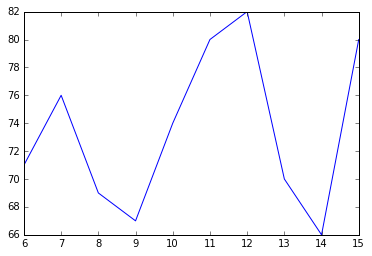

In [32]:
# for a quick graphical overview
temps.plot()

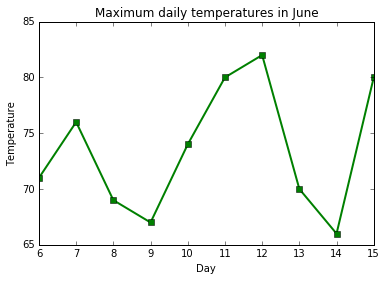

In [38]:
# for a nicely formatted plot
temps.plot(style='-s', lw=2, color='green')
axis((6, 15, 65, 85))
xlabel('Day')
ylabel('Temperature')
title('Maximum daily temperatures in June')
None

In [39]:
# maximum temperature was above 75 degrees
temps[temps > 75]

7     76.0
11    80.0
12    82.0
15    80.0
Name: Temperatures, dtype: float64

In [40]:
temps.shape

(10,)

# 2. The DataFrame class

The **DataFrame** class is used to represent two-dimensional data

In [43]:
grades = DataFrame(
    [['Alice', 80., 92., 84,],
    ['Bob', 78., NaN, 86,],
    ['Samaly', 75., 78., 88.]],
    index = [17005, 17035, 17028],
    columns = ['Name', 'Test 1', 'Test 2', 'Final']
)

grades

,Name,Test 1,Test 2,Final
17005,Alice,80.0,92.0,84.0
17035,Bob,78.0,NaN,86.0
17028,Samaly,75.0,78.0,88.0


In [44]:
DataFrame?

In [45]:
idx = pd.Index(["First Row", "Second Row"])
col1 = Series([1, 2], index=idx)
col2 = Series([3, 4], index=idx)
data = {"Column 1":col1, "Column2":col2}
df = DataFrame(data)
df

,Column 1,Column2
First Row,1,3
Second Row,2,4


In [48]:
grades.loc[:, 'Score'] = 0.25 * (grades['Test 1'] + grades['Test 2'] + 2 * grades['Final'])
grades

,Name,Test 1,Test 2,Final,Score
17005,Alice,80.0,92.0,84.0,85.00
17035,Bob,78.0,98.0,86.0,87.00
17028,Samaly,75.0,78.0,88.0,82.25


In [49]:
grades.loc[17035, 'Test 2'] = 98
grades

,Name,Test 1,Test 2,Final,Score
17005,Alice,80.0,92.0,84.0,85.00
17035,Bob,78.0,98.0,86.0,87.00
17028,Samaly,75.0,78.0,88.0,82.25


In [50]:
grades.insert(4, 'Extra credit', [2., 6., 10.])
grades

,Name,Test 1,Test 2,Final,Extra credit,Score
17005,Alice,80.0,92.0,84.0,2.0,85.00
17035,Bob,78.0,98.0,86.0,6.0,87.00
17028,Samaly,75.0,78.0,88.0,10.0,82.25


In [52]:
grades.loc[17011,:] = ['George', 92, 88, 91, 9, NaN]
grades

,Name,Test 1,Test 2,Final,Extra credit,Score
17005,Alice,80.0,92.0,84.0,2.0,85.00
17035,Bob,78.0,98.0,86.0,6.0,87.00
17028,Samaly,75.0,78.0,88.0,10.0,82.25
17011,George,92.0,88.0,91.0,9.0,NaN


In [53]:
grades.loc[:,'Score'] = 0.25 * (grades['Test 1'] + grades['Test 2'] + 2 *
grades['Final']) + grades['Extra credit']
grades

,Name,Test 1,Test 2,Final,Extra credit,Score
17005,Alice,80.0,92.0,84.0,2.0,87.00
17035,Bob,78.0,98.0,86.0,6.0,93.00
17028,Samaly,75.0,78.0,88.0,10.0,92.25
17011,George,92.0,88.0,91.0,9.0,99.50


In [54]:
# Find Students who got an A and had a score of less than 78 in Test 1.
grades[(grades['Score'] >= 90) & (grades['Test 1'] < 78)]

,Name,Test 1,Test 2,Final,Extra credit,Score
17028,Samaly,75.0,78.0,88.0,10.0,92.25


In [61]:
# the names and scores of the students who have a score of at least 80, but less than 90
grades[(80 <= grades['Score']) & grades['Score'] < 90].loc[:, ['Name', 'Score']]

,Name,Score
17005,Alice,87.00
17035,Bob,93.00
17028,Samaly,92.25
17011,George,99.50


In [63]:
means = [0, 0, 1, 1, -1, -1, -2, -2]
sdevs = [1, 2, 1, 2, 1, 2, 1, 2]
random_data = {}
nrows = 30
for mean, sdev in zip(means, sdevs):
    label = 'Mean = {}, sd = {}'.format(mean, sdev)
    random_data[label] = normal(mean, sdev, nrows)
row_labels = ['Row {}'.format(i) for i in range(nrows)]
dframe = DataFrame (random_data, index=row_labels)
dframe

,"Mean = -1, sd = 1","Mean = -1, sd = 2","Mean = -2, sd = 1","Mean = -2, sd = 2","Mean = 0, sd = 1","Mean = 0, sd = 2","Mean = 1, sd = 1","Mean = 1, sd = 2"
Row 0,-2.791330,1.359483,0.269685,-2.550369,0.524773,1.132685,-0.958139,4.226053
Row 1,-1.045152,-1.330461,-1.095296,-3.290650,-0.881401,-1.665041,-0.901571,1.680149
Row 2,-1.919142,-1.177139,-1.067711,-3.395376,-1.486370,1.756740,1.727168,0.826540
Row 3,0.377973,-0.014229,-2.263063,-4.284464,-0.000397,-0.365085,0.509255,0.667085
Row 4,-0.113117,-2.967594,-2.402889,-1.935173,0.306669,-0.781291,2.348691,1.360299
Row 5,-1.420188,-1.204026,-2.026863,0.362340,0.496334,5.332068,0.614456,0.440122
Row 6,-0.837336,-3.419722,-1.594882,-3.561918,1.202178,-0.055514,0.135722,1.675816
Row 7,-0.359247,-4.995115,-1.297953,0.916738,-0.677636,0.007396,-0.157328,1.570037
Row 8,-0.579335,-1.515917,-1.304916,-2.659974,2.357510,-0.497914,1.030859,0.703749
Row 9,-1.865919,2.538343,-2.245147,-3.040999,-0.914259,-1.388874,1.271935,3.935733


In [64]:
dframe_slice = dframe.ix['Row 3': 'Row 11', 5:]
dframe_slice

,"Mean = 0, sd = 2","Mean = 1, sd = 1","Mean = 1, sd = 2"
Row 3,-0.365085,0.509255,0.667085
Row 4,-0.781291,2.348691,1.360299
Row 5,5.332068,0.614456,0.440122
Row 6,-0.055514,0.135722,1.675816
Row 7,0.007396,-0.157328,1.570037
Row 8,-0.497914,1.030859,0.703749
Row 9,-1.388874,1.271935,3.935733
Row 10,-0.162934,-0.868489,1.896515
Row 11,1.157471,0.592795,-1.459318


In [67]:
dframe_slice.loc['Row 3', 'Mean = 1, sd = 2'] = normal(1, 2)
print dframe_slice.loc['Row 3', 'Mean = 1, sd = 2']
print dframe.loc['Row 3', 'Mean = 1, sd = 2']

3.7030681601
0.667085160404


In [68]:
dframe_slice_copy = dframe.ix['Row 3':'Row 11', 5:].copy()
dframe_slice_copy

,"Mean = 0, sd = 2","Mean = 1, sd = 1","Mean = 1, sd = 2"
Row 3,-0.365085,0.509255,0.667085
Row 4,-0.781291,2.348691,1.360299
Row 5,5.332068,0.614456,0.440122
Row 6,-0.055514,0.135722,1.675816
Row 7,0.007396,-0.157328,1.570037
Row 8,-0.497914,1.030859,0.703749
Row 9,-1.388874,1.271935,3.935733
Row 10,-0.162934,-0.868489,1.896515
Row 11,1.157471,0.592795,-1.459318


In [70]:
dframe_slice_copy.loc['Row 3','Mean = 1, sd = 2'] = normal(1, 2)
print dframe_slice_copy.loc['Row 3','Mean = 1, sd = 2']
print dframe.loc['Row 3','Mean = 1, sd = 2']

0.734742621608
0.667085160404


# 3. Computational and Graphics tools

In [75]:
mean_series = dframe.mean()
mean_series

Mean = -1, sd = 1   -1.098333
Mean = -1, sd = 2   -1.172654
Mean = -2, sd = 1   -1.951305
Mean = -2, sd = 2   -2.472679
Mean = 0, sd = 1    -0.367476
Mean = 0, sd = 2     0.398435
Mean = 1, sd = 1     0.689693
Mean = 1, sd = 2     1.073404
dtype: float64

In [76]:
std_series = dframe.std()
std_series

Mean = -1, sd = 1    0.920523
Mean = -1, sd = 2    1.695435
Mean = -2, sd = 1    1.017222
Mean = -2, sd = 2    1.645836
Mean = 0, sd = 1     1.003919
Mean = 0, sd = 2     1.966350
Mean = 1, sd = 1     0.895219
Mean = 1, sd = 2     1.437256
dtype: float64

In [78]:
mean_std = DataFrame([dict(mean_series), dict(std_series)], index=['mean', 'std'])
mean_std

,"Mean = -1, sd = 1","Mean = -1, sd = 2","Mean = -2, sd = 1","Mean = -2, sd = 2","Mean = 0, sd = 1","Mean = 0, sd = 2","Mean = 1, sd = 1","Mean = 1, sd = 2"
mean,-1.098333,-1.172654,-1.951305,-2.472679,-0.367476,0.398435,0.689693,1.073404
std,0.920523,1.695435,1.017222,1.645836,1.003919,1.966350,0.895219,1.437256


In [79]:
# to standardize the data in all columns so that they all have a 
# common mean value 100 and standard deviation value 20.

dframe_stnd = 100 + 20 *(dframe - mean_std.iloc[0, :]) / mean_std.iloc[1,:]
dframe_stnd

,"Mean = -1, sd = 1","Mean = -1, sd = 2","Mean = -2, sd = 1","Mean = -2, sd = 2","Mean = 0, sd = 1","Mean = 0, sd = 2","Mean = 1, sd = 1","Mean = 1, sd = 2"
Row 0,63.216648,129.870044,143.667751,99.055917,117.775332,107.468151,63.185932,143.870392
Row 1,101.155442,98.138441,116.830317,90.060110,89.761618,79.012111,64.449714,108.443108
Row 2,82.166475,99.947086,117.372674,88.787501,77.709471,113.815494,123.178129,96.564785
Row 3,132.075348,113.665221,93.870399,77.983412,107.312932,92.234133,95.968851,94.345907
Row 4,121.405557,78.826207,91.121218,106.531707,113.430279,88.000854,137.063512,103.992263
Row 5,93.007126,99.629923,98.514423,134.450800,117.208769,150.180628,98.319134,91.187619
Row 6,105.670623,73.492732,107.007761,86.763700,131.270533,95.382825,87.623780,108.382810
Row 7,116.057940,54.908799,112.845801,141.187775,93.821028,96.022686,81.076775,106.910853
Row 8,111.276148,95.950731,112.708898,97.724005,154.286988,90.883119,107.621962,94.856099
Row 9,83.322840,143.776325,94.222640,93.093842,89.107025,81.821043,113.007800,139.830478


In [80]:
# To check that we get the expected results
print dframe_stnd.mean()
print dframe_stnd.std()

Mean = -1, sd = 1    100.0
Mean = -1, sd = 2    100.0
Mean = -2, sd = 1    100.0
Mean = -2, sd = 2    100.0
Mean = 0, sd = 1     100.0
Mean = 0, sd = 2     100.0
Mean = 1, sd = 1     100.0
Mean = 1, sd = 2     100.0
dtype: float64
Mean = -1, sd = 1    20.0
Mean = -1, sd = 2    20.0
Mean = -2, sd = 1    20.0
Mean = -2, sd = 2    20.0
Mean = 0, sd = 1     20.0
Mean = 0, sd = 2     20.0
Mean = 1, sd = 1     20.0
Mean = 1, sd = 2     20.0
dtype: float64


In [81]:
zscores = mean_std.iloc[0, :] / (mean_std.iloc[1,:] / sqrt (len(dframe)))
zscores

Mean = -1, sd = 1    -6.535213
Mean = -1, sd = 2    -3.788342
Mean = -2, sd = 1   -10.506790
Mean = -2, sd = 2    -8.228897
Mean = 0, sd = 1     -2.004894
Mean = 0, sd = 2      1.109833
Mean = 1, sd = 1      4.219755
Mean = 1, sd = 2      4.090626
dtype: float64

In [83]:
from scipy.stats import norm
pvalues = 2 * norm.cdf(-abs(zscores)) * 100
pvalues_series = Series(pvalues, index = zscores.index)
pvalues_series

Mean = -1, sd = 1    6.351892e-09
Mean = -1, sd = 2    1.516562e-02
Mean = -2, sd = 1    8.038294e-24
Mean = -2, sd = 2    1.889451e-14
Mean = 0, sd = 1     4.497443e+00
Mean = 0, sd = 2     2.670711e+01
Mean = 1, sd = 1     2.445674e-03
Mean = 1, sd = 2     4.302098e-03
dtype: float64

In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


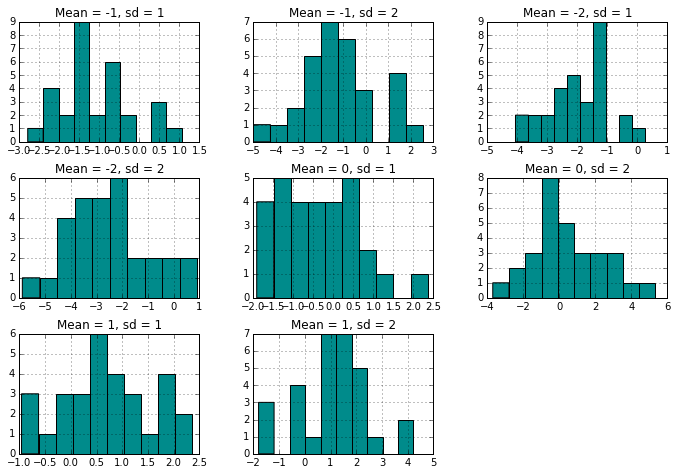

In [92]:
dframe.hist(color='DarkCyan')
subplots_adjust(left = 0.5, right = 2, top = 2.5, bottom = 1.0)
dframe.loc[:, 'Mean = 0, sd = 2'].hist(bins = 40, range = (-10, 10), color='LightYellow')
title('Normal variates, mean 0, standard deviation 2')
None

**Geometrical Brownian Motion**

In [94]:
mu = 0.15
sigma = 0.33
S0 = 150

In [95]:
nsteps = 200
tmax = 20.
dt = tmax / nsteps
times = arange(0, tmax, dt)

In [96]:
gbm_data = DataFrame(times, columns=['t'], index=range(nsteps))

In [1]:
gbm_data.loc[: 5, :]

NameError: name 'gbm_data' is not defined

In [98]:
gbm_data['drift'] = (mu - sigma ** 2 / 2) * gbm_data.loc[:, 't']

In [99]:
gbm_data['dW'] = normal(0.0, sigma * dt, nsteps)
gbm_data['W'] = gbm_data.loc[:, 'dW'].cumsum()
gbm_data.ix[0, 'W'] = 0.0

In [100]:
gbm_data['S'] = S0 * exp(gbm_data.loc[:, 'drift'] + gbm_data.loc[:, 'W'])

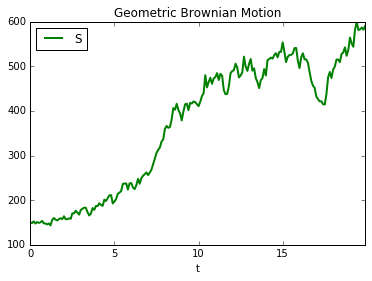

In [101]:
gbm_data.plot(x='t', y='S', lw=2, color='green',
             title='Geometric Brownian Motion')

# 4. An example with a realistic dataset